In [24]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import silhouette_score

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
# Reading file
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
pd.set_option('display.max_columns', 21)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [27]:
# statistical Property of numerical columns
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [28]:
# statistical Property of Object columns
df.describe(include=[object])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Data Preprocessing

In [30]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [31]:
# Droping unnecessary columns
df.drop(["customerID"], axis=1, inplace=True)

In [32]:
df.duplicated().sum()

np.int64(22)

In [33]:
df.drop_duplicates(inplace=True)

In [34]:
# Function to replace 'NaN' with mean
def replace_and_fill_nan_total_charges(df):
    df['TotalCharges'] = df['TotalCharges'].replace('NaN', pd.NA)
    # Converting TotalCharges from String to Float
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

    # Calculate the mean
    mean_value = df['TotalCharges'].mean()
    df['TotalCharges'].fillna(mean_value, inplace=True)

    return df
df = replace_and_fill_nan_total_charges(df)

## Data Visualization

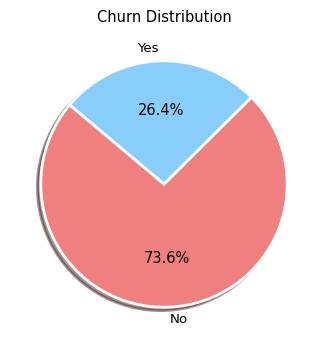

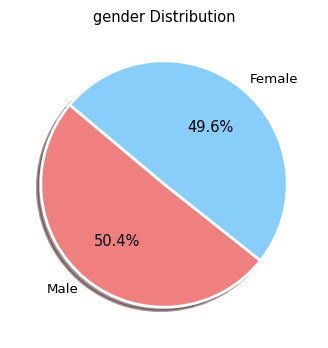

In [35]:
# Ploting a pie chart for churn distribution
def categorical_chart(df, Column="Churn"):
    churn_counts = df[Column].value_counts()
    plt.figure(figsize=(4, 4))
    churn_counts.plot(
        kind='pie',
        autopct='%1.1f%%',
        startangle=140,
        colors=['lightcoral', 'lightskyblue'],
        shadow=True,
        wedgeprops={'edgecolor': 'white', 'linewidth': 2}
    )

    plt.title(f'{Column} Distribution')
    plt.ylabel('')
    plt.show()

# Calling the function
categorical_chart(df, "Churn")
categorical_chart(df, "gender")

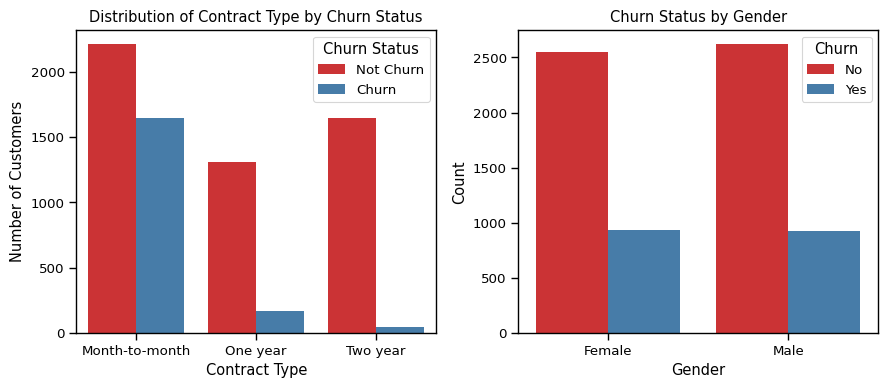

In [36]:
#  Ploting churn by Contract Type and Gender status
def relational_chart(df):
    plt.figure(figsize=(9, 4))

    # Subplot for Contract Type
    plt.subplot(1, 2, 1)
    sns.countplot(data=df, x="Contract", hue="Churn", palette="Set1")
    plt.title("Distribution of Contract Type by Churn Status")
    plt.xlabel("Contract Type")
    plt.ylabel("Number of Customers")
    plt.legend(title='Churn Status', labels=['Not Churn', 'Churn'], loc='upper right')

    # Subplot for Gender
    plt.subplot(1, 2, 2)
    sns.countplot(x='gender', hue='Churn', data=df, palette='Set1')
    plt.title('Churn Status by Gender')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.legend(title='Churn')
    plt.tight_layout()
    plt.show()

# Calling the function
relational_chart(df)

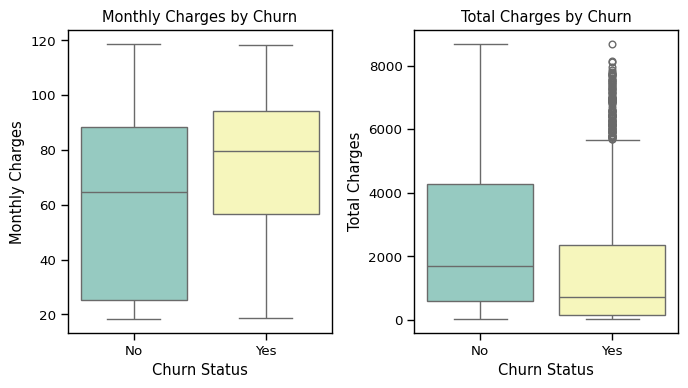

In [37]:
# Ploting Monthly and Total Charges by Churn Status
def plot_charges_by_churn(df):
    plt.figure(figsize=(7, 4))

    # Subplot for Monthly
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette="Set3")
    plt.title('Monthly Charges by Churn')
    plt.xlabel('Churn Status')
    plt.ylabel('Monthly Charges')

    # Subplot for Total
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, x='Churn', y='TotalCharges', palette="Set3")
    plt.title('Total Charges by Churn')
    plt.xlabel('Churn Status')
    plt.ylabel('Total Charges')
    plt.tight_layout()
    plt.show()

# Calling the function
plot_charges_by_churn(df)

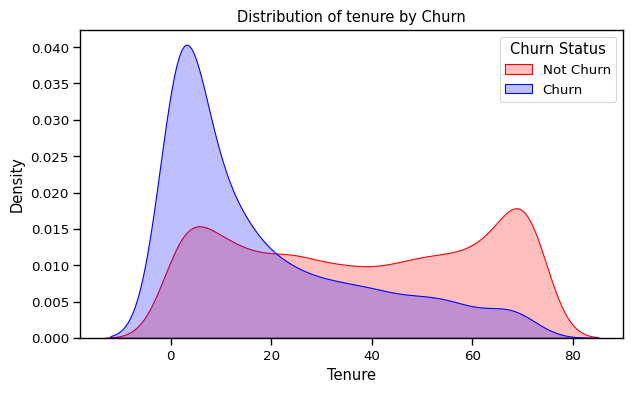

In [38]:
# Ploting Tenure by Churn status
def plot_tenure_distribution_by_churn(df):
    sns.set_context("paper", font_scale=1.1)
    plt.figure(figsize=(7, 4))
    ax = sns.kdeplot(df['tenure'][df['Churn'] == 'No'], color="Red", shade=True)
    ax = sns.kdeplot(df['tenure'][df['Churn'] == 'Yes'], ax=ax, color="Blue", shade=True)
    legend = ax.legend(title='Churn Status', labels=['Not Churn', 'Churn'], loc='upper right')
    ax.set_ylabel('Density')
    ax.set_xlabel('Tenure')
    ax.set_title('Distribution of tenure by Churn')
    plt.show()

# Calling the function
plot_tenure_distribution_by_churn(df)

# Feature Engineering

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(1, 5))

# Applying MinMaxScaler
scale_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[scale_cols] = scaler.fit_transform(df[scale_cols])

In [40]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Applying Label Encoding
object_cols = df.select_dtypes(include=['object']).columns
for col in object_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [41]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1.055556,0,1,0,0,2,0,0,0,0,0,1,2,1.461692,1.005100,0
1,1,0,0,0,2.888889,1,0,0,2,0,2,0,0,0,1,0,3,2.540299,1.863466,0
2,1,0,0,0,1.111111,1,0,0,2,2,0,0,0,0,0,1,3,2.416915,1.041242,1
3,1,0,0,0,3.500000,0,1,0,2,0,2,2,0,0,1,0,0,1.957214,1.840965,0
4,0,0,0,0,1.111111,1,0,1,0,0,0,0,0,0,0,1,2,3.087562,1.061320,1


In [42]:
# Selecting the six most relevant features
features = ['tenure', 'gender', 'TotalCharges', 'Partner', 'Contract', 'SeniorCitizen']
X = df[features]
y = df['Churn']

In [43]:
from imblearn.over_sampling import SMOTE

sampler = SMOTE()
X_new, y_new = sampler.fit_resample(X, y)

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.1, random_state=42)

# Modeling

### 1. DecisionTreeClassifier

In [48]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3, min_samples_split=10, min_samples_leaf=10)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, min_samples_split=10)

In [49]:
y_pred = model.predict(X_test)

Model Name: DecisionTreeClassifier
Training Score: 0.744378698224852
Testing Score: 0.7512100677637947
Accuracy: 0.7512100677637947
[[331 173]
 [ 84 445]]
              precision    recall  f1-score   support

           0       0.80      0.66      0.72       504
           1       0.72      0.84      0.78       529

    accuracy                           0.75      1033
   macro avg       0.76      0.75      0.75      1033
weighted avg       0.76      0.75      0.75      1033



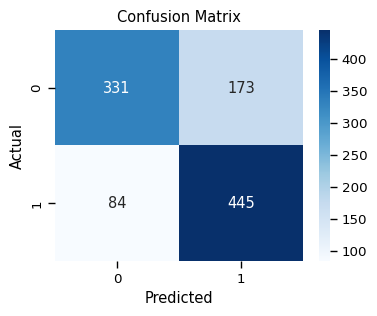

In [54]:
# Function to evaluate and visualize model performance
def evaluate_model(model, X_train, y_train, X_test, y_test, y_pred):
  train_score = model.score(X_train, y_train)
  test_score = model.score(X_test, y_test)
  acc = accuracy_score(y_test, y_pred)
  conf_matrix = confusion_matrix(y_test, y_pred)
  name = type(model).__name__

  # Printing metrics
  print(f"Model Name: {name}")
  print(f"Training Score: {train_score}")
  print(f"Testing Score: {test_score}")
  print(f"Accuracy: {acc}")
  print(conf_matrix)
  print(classification_report(y_test, y_pred))

  # Visualizing the confusion matrix
  plt.figure(figsize=(4, 3))
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Confusion Matrix')
  plt.show()

evaluate_model(model, X_train, y_train, X_test, y_test, y_pred)

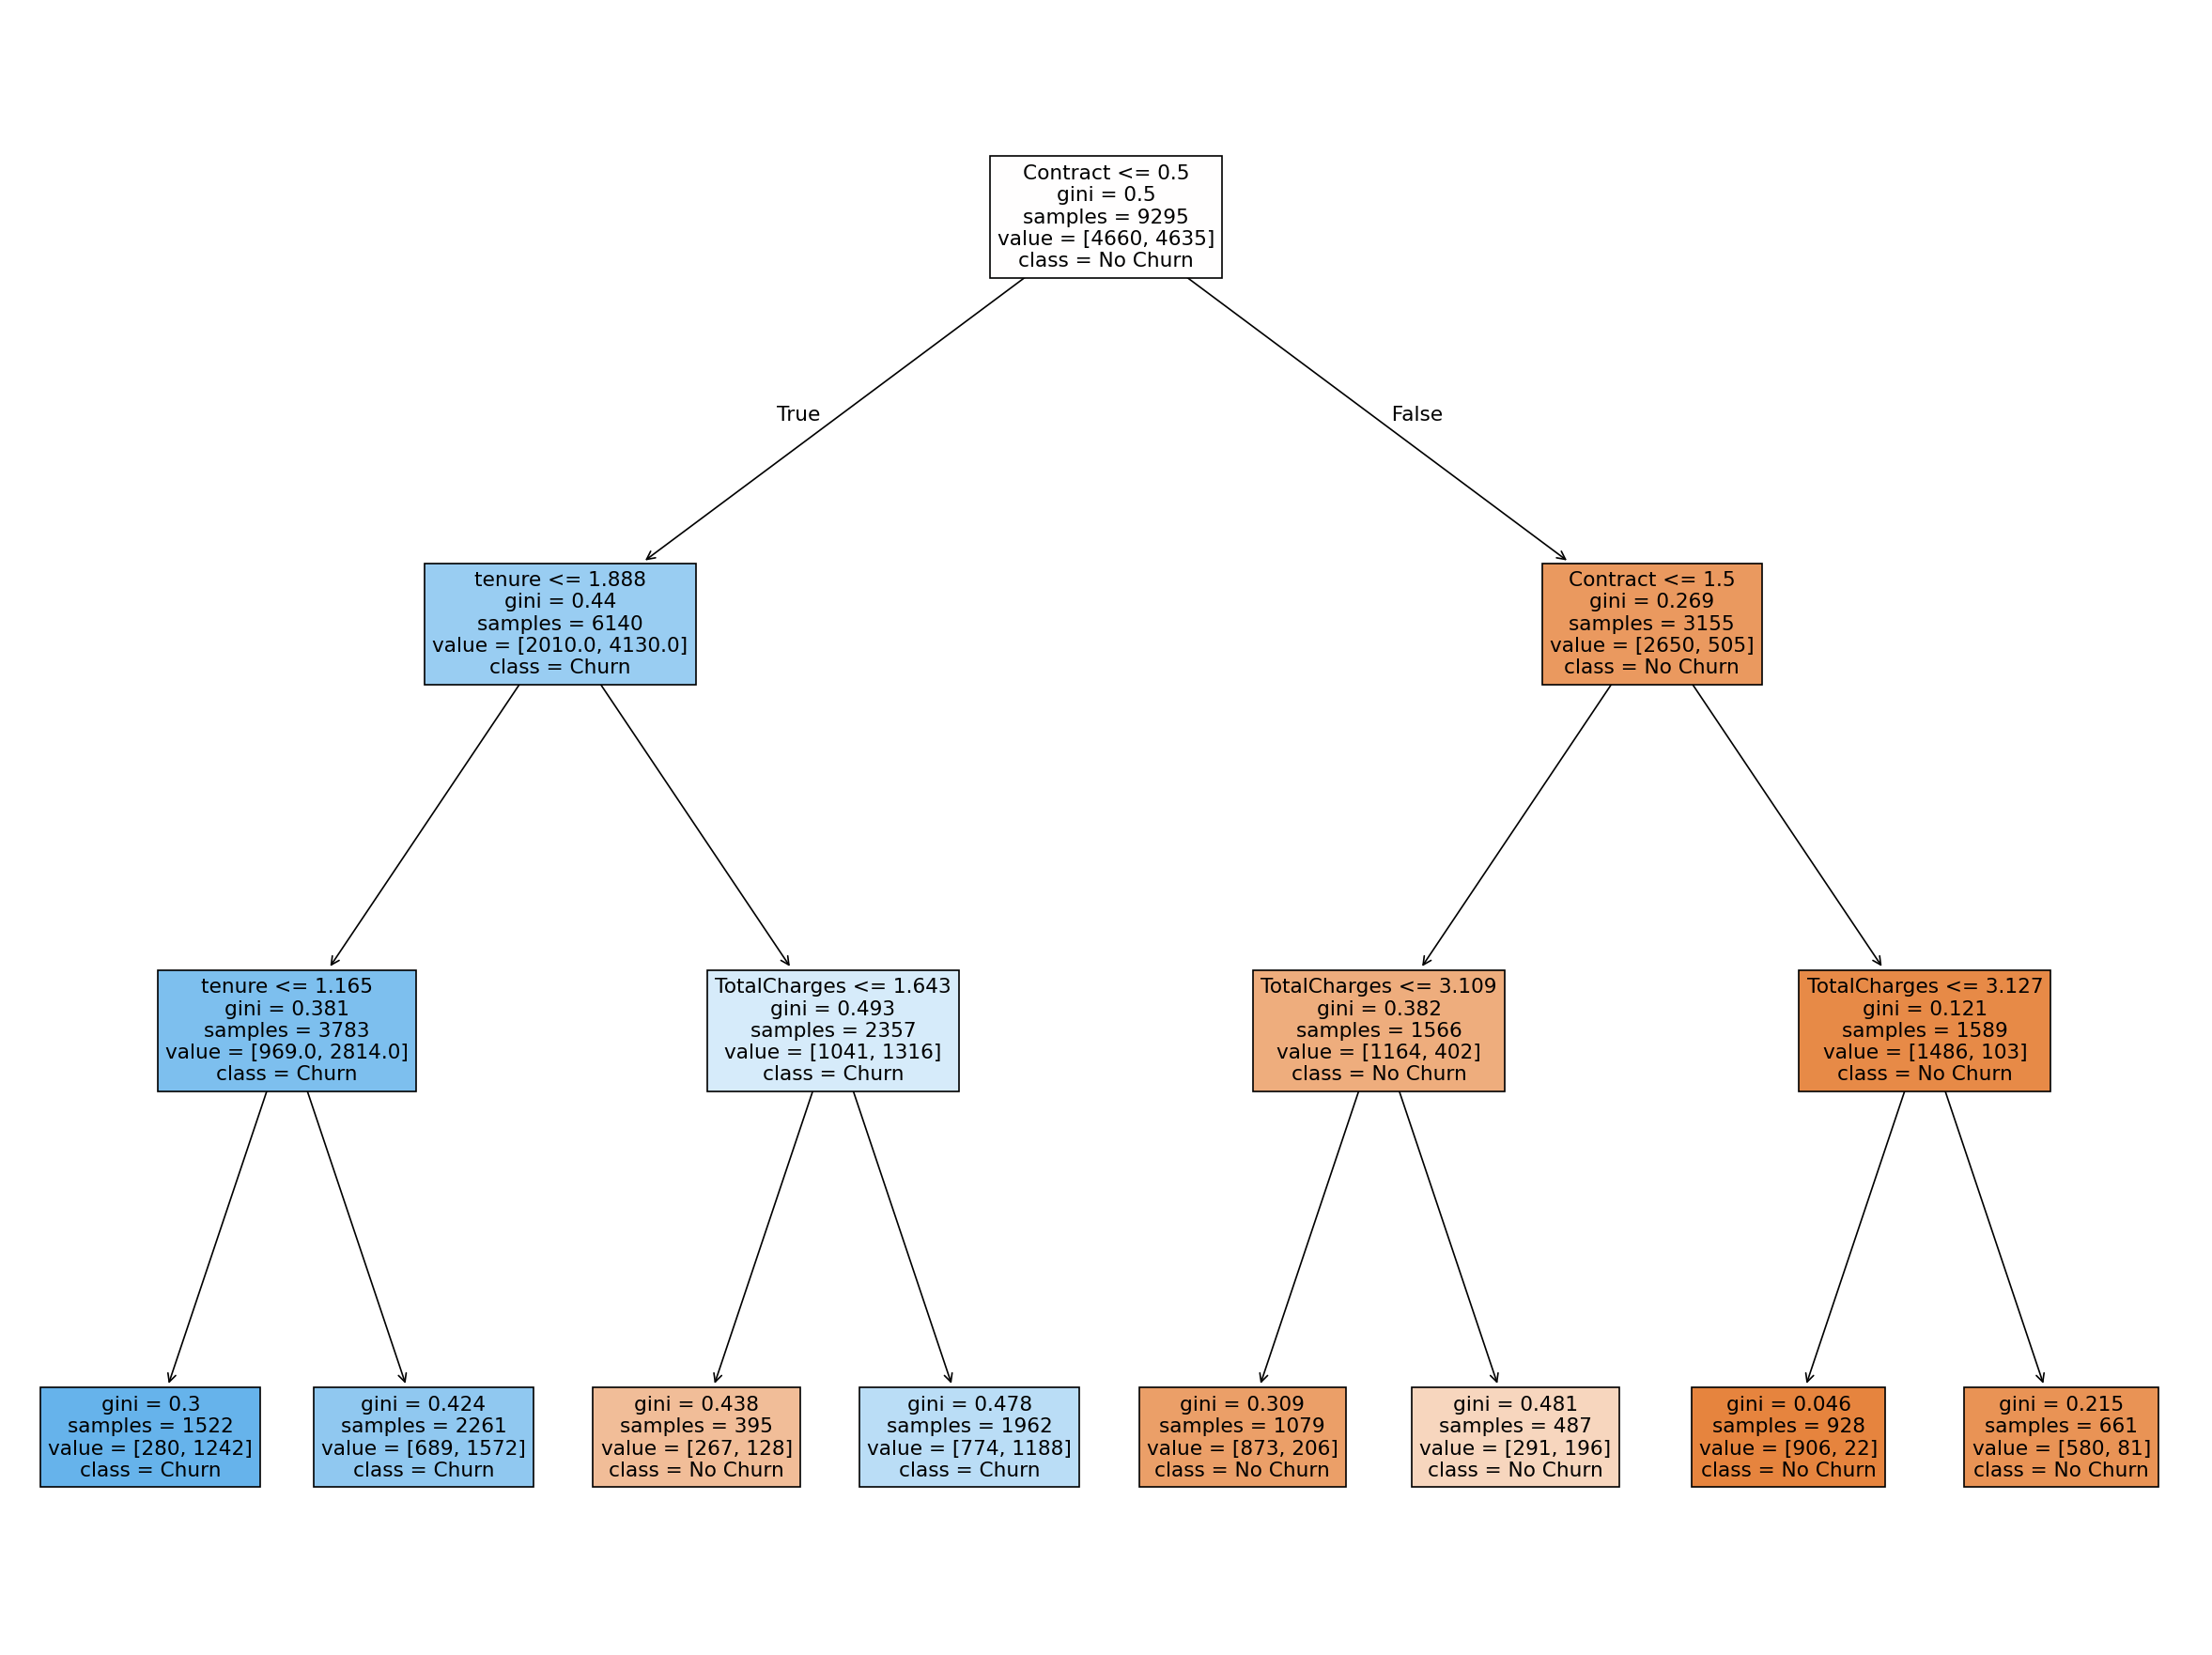

In [51]:
# Ploting the Decision Tree
plt.figure(figsize=(20, 15), dpi=150)
plot_tree(model, feature_names=features, class_names=['No Churn', 'Churn'], filled=True)
plt.show()

### 2. KMeans Clustering

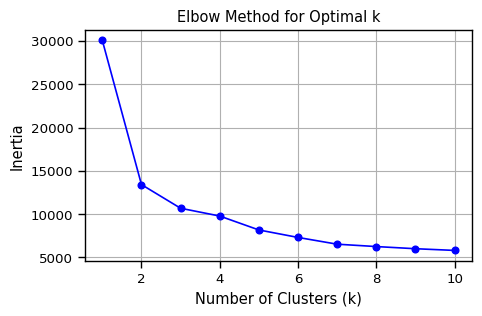

In [55]:
# Elbow Method to find the optimal value of k
def elbow_method(X, k_range=range(1, 11)):
    inertia = []

    # Loop through the range of k values
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)

    # Plotting the Elbow Method graph
    plt.figure(figsize=(5, 3))
    plt.plot(k_range, inertia, marker='o', linestyle='-', color='b')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

# Calling the function for elbow method
elbow_method(X)

In [44]:
# KMeans Clustering function
def apply_kmeans(X, optimal_k):
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    clusters = kmeans.fit_predict(X)
    return clusters

# Assume optimal_k is decided after elbow method, let's say k=2
optimal_k = 2
clusters = apply_kmeans(X, optimal_k)

In [45]:
# Add the predicted cluster labels to the DataFrame
df['Predicted_Cluster'] = clusters

In [46]:
# Function to evaluate the KMeans Clustering performance
def evaluate_clustering(y_true, y_pred):
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:\n", conf_matrix)

    # Classification Report
    print("Classification Report:\n", classification_report(y_true, y_pred))

    # Visualizing the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix for KMeans Clustering')
    plt.show()

Confusion Matrix:
 [[2573 2591]
 [1521  336]]
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.50      0.56      5164
           1       0.11      0.18      0.14      1857

    accuracy                           0.41      7021
   macro avg       0.37      0.34      0.35      7021
weighted avg       0.49      0.41      0.45      7021



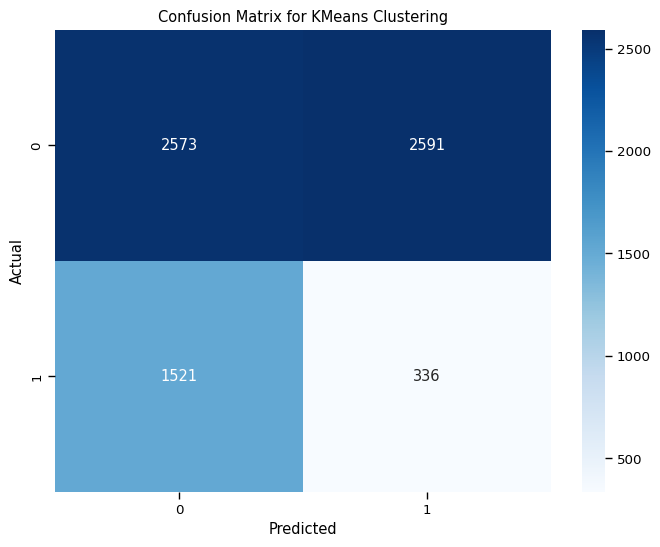

In [47]:
# Predicting cluster labels from KMeans
y_true = y
clusters = apply_kmeans(X, optimal_k)

# Calling the function
evaluate_clustering(y_true, clusters)

In [52]:
def evaluate_clustering(X, clusters):
    # Calculating Silhouette Score
    silhouette_avg = silhouette_score(X, clusters)
    print(f"Silhouette Score: {silhouette_avg:.3f}")

evaluate_clustering(X, clusters)

Silhouette Score: 0.462


In [58]:
# Define the number of clusters
k = 2

# Assuming X contains the feature columns for clustering
kmeans = KMeans(n_clusters=k, random_state=42)
df['Predicted_Cluster'] = kmeans.fit_predict(X)
df['Actual_Cluster'] = df['Churn']
print(df[['Actual_Cluster', 'Predicted_Cluster']].head())

   Actual_Cluster  Predicted_Cluster
0               0                  0
1               0                  0
2               1                  0
3               0                  1
4               1                  0


In [59]:
# Function to calculate and display statistical properties for each cluster
def display_cluster_statistics(df, features, label_name, label_column):
    print(f"\n--- Statistical Properties for {label_name} Clusters ---\n")
    cluster_groups = df.groupby(label_column)[features]
    for cluster, stats in cluster_groups:
        print(f"Cluster: {cluster}")
        print(stats.describe())
        print("\n" + "-" * 50 + "\n")

# Selecting numerical features for statistical analysis
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Displaying statistics for Actual Clusters
display_cluster_statistics(df, numerical_features, 'Actual', 'Actual_Cluster')

# Displaying statistics for Predicted Clusters
display_cluster_statistics(df, numerical_features, 'Predicted', 'Predicted_Cluster')



--- Statistical Properties for Actual Clusters ---

Cluster: 0
            tenure  MonthlyCharges  TotalCharges
count  5164.000000     5164.000000   5164.000000
mean      3.091155        2.715219      2.172808
std       1.337961        1.236610      1.073891
min       1.000000        1.000000      1.000000
25%       1.833333        1.272637      1.261874
50%       3.111111        2.840796      1.775467
75%       4.388889        3.794527      2.959503
max       5.000000        5.000000      4.994300

--------------------------------------------------

Cluster: 1
            tenure  MonthlyCharges  TotalCharges
count  1857.000000     1857.000000   1857.000000
mean      2.004936        3.242958      1.702782
std       1.085902        0.979005      0.873829
min       1.055556        1.023881      1.000023
25%       1.111111        2.522388      1.056266
50%       1.555556        3.445771      1.320471
75%       2.611111        4.024876      2.073806
max       5.000000        4.984080     